In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


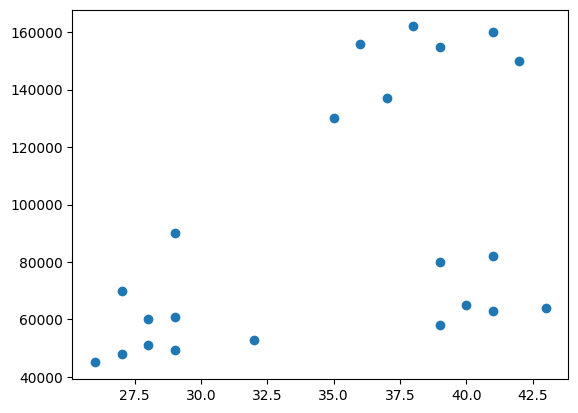

In [6]:
plt.scatter(df.Age, df['Income($)'])

In [7]:
from sklearn.cluster import KMeans

In [13]:
k = KMeans(n_clusters= 3)
y_pred = k.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [14]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [18]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

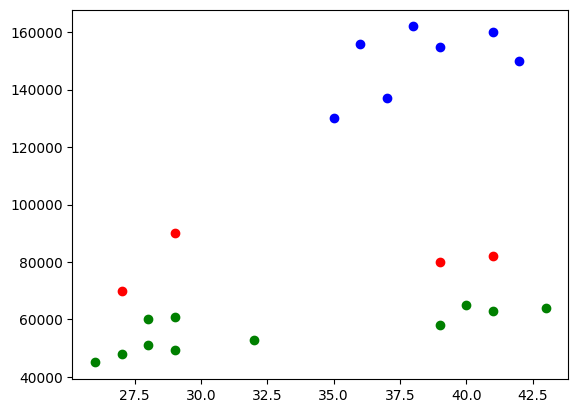

In [19]:
plt.scatter(df0.Age, df0['Income($)'], color = 'green')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
mm = MinMaxScaler()
mm.fit(df[['Income($)']])
df['Income($)'] = mm.transform(df[['Income($)']])

mm.fit(df[['Age']])
df['Age'] = mm.transform(df[['Age']])

In [26]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [27]:
k = KMeans(n_clusters= 3)
y_pred = k.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [28]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [29]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

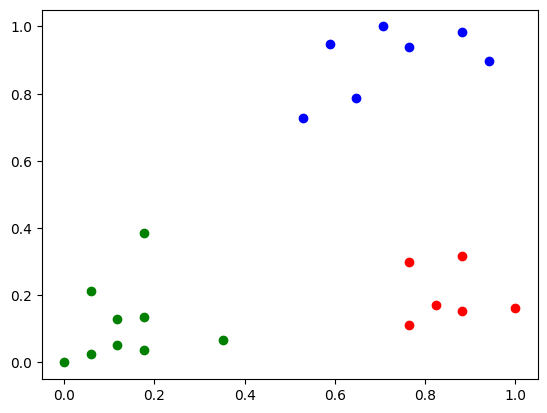

In [30]:
plt.scatter(df0.Age, df0['Income($)'], color = 'green')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')

In [34]:
sse = []
kr = range(1,11)
for k in kr:
    km = KMeans(n_clusters= k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    

In [35]:
sse

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.3923766528801945,
 0.3417597180720832,
 0.23047208837899555,
 0.17681044133887713,
 0.14851185142382312,
 0.1321471082406226,
 0.08725493566383163]

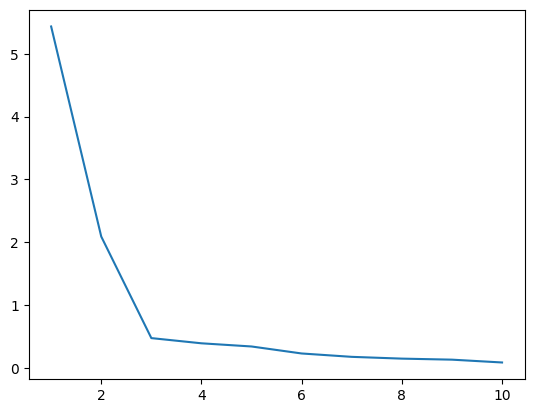

In [36]:
plt.plot(kr, sse)